In [1]:
# Importing the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
#DATA COLLECTION--
Abalone_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
Abalone_data.head(10)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [3]:
# Checking the shape of the whole dataset.
Abalone_data.shape

(4177, 9)

In [4]:
# Checking the total information about the dataset.
Abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
# Checking the column names.
Abalone_data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [6]:
# Checking the null values.
Abalone_data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [7]:
# There are no null values in the dataset.

#EPLORATORY DATA ANALYSIS/VISUALIZATION.
# Checking statistical measures of the dataset.
# Statistic Summary.
Abalone_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>,
        <AxesSubplot:title={'center':'Whole weight'}>],
       [<AxesSubplot:title={'center':'Shucked weight'}>,
        <AxesSubplot:title={'center':'Viscera weight'}>,
        <AxesSubplot:title={'center':'Shell weight'}>,
        <AxesSubplot:title={'center':'Rings'}>]], dtype=object)

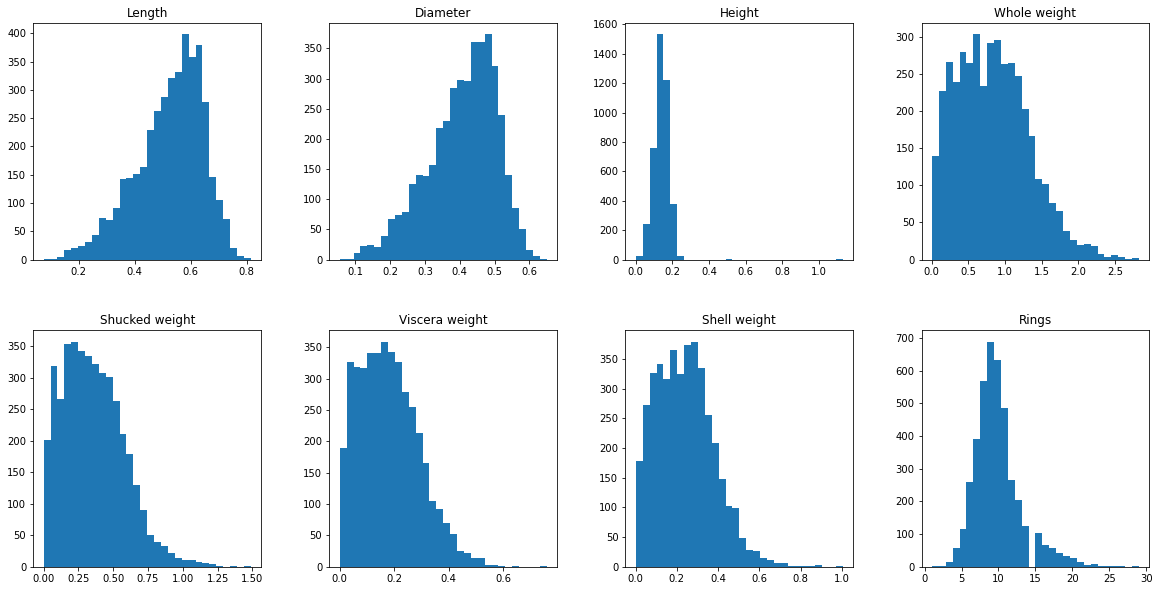

In [8]:
# Checking each column against rings column.
Abalone_data.hist(figsize=(20,10), grid=False, layout=(2, 4), bins = 30)

In [9]:
import warnings
warnings.filterwarnings('ignore')
Abalone_data.skew().sort_values(ascending=False)

Height            3.128817
Rings             1.114102
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Diameter         -0.609198
Length           -0.639873
dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

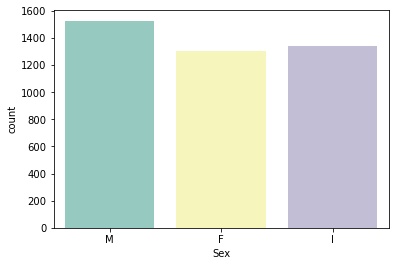

In [10]:
sns.countplot(x = 'Sex', data =Abalone_data, palette="Set3")


<AxesSubplot:xlabel='Sex', ylabel='Rings'>

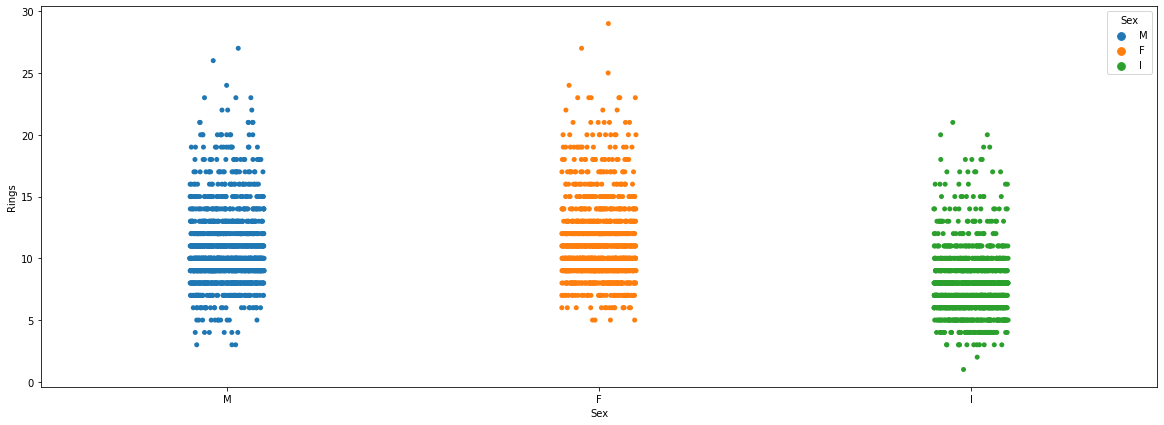

In [11]:
plt.figure(figsize = (20,7))
sns.stripplot(x = 'Sex', y = 'Rings', data = Abalone_data, hue = 'Sex')

In [12]:
# Male : age majority lies in between 7.5 years to 19 years
# Female: age majority lies in between 8 years to 19 years
# Infant: age majority lies in between 4 years to < 10 years

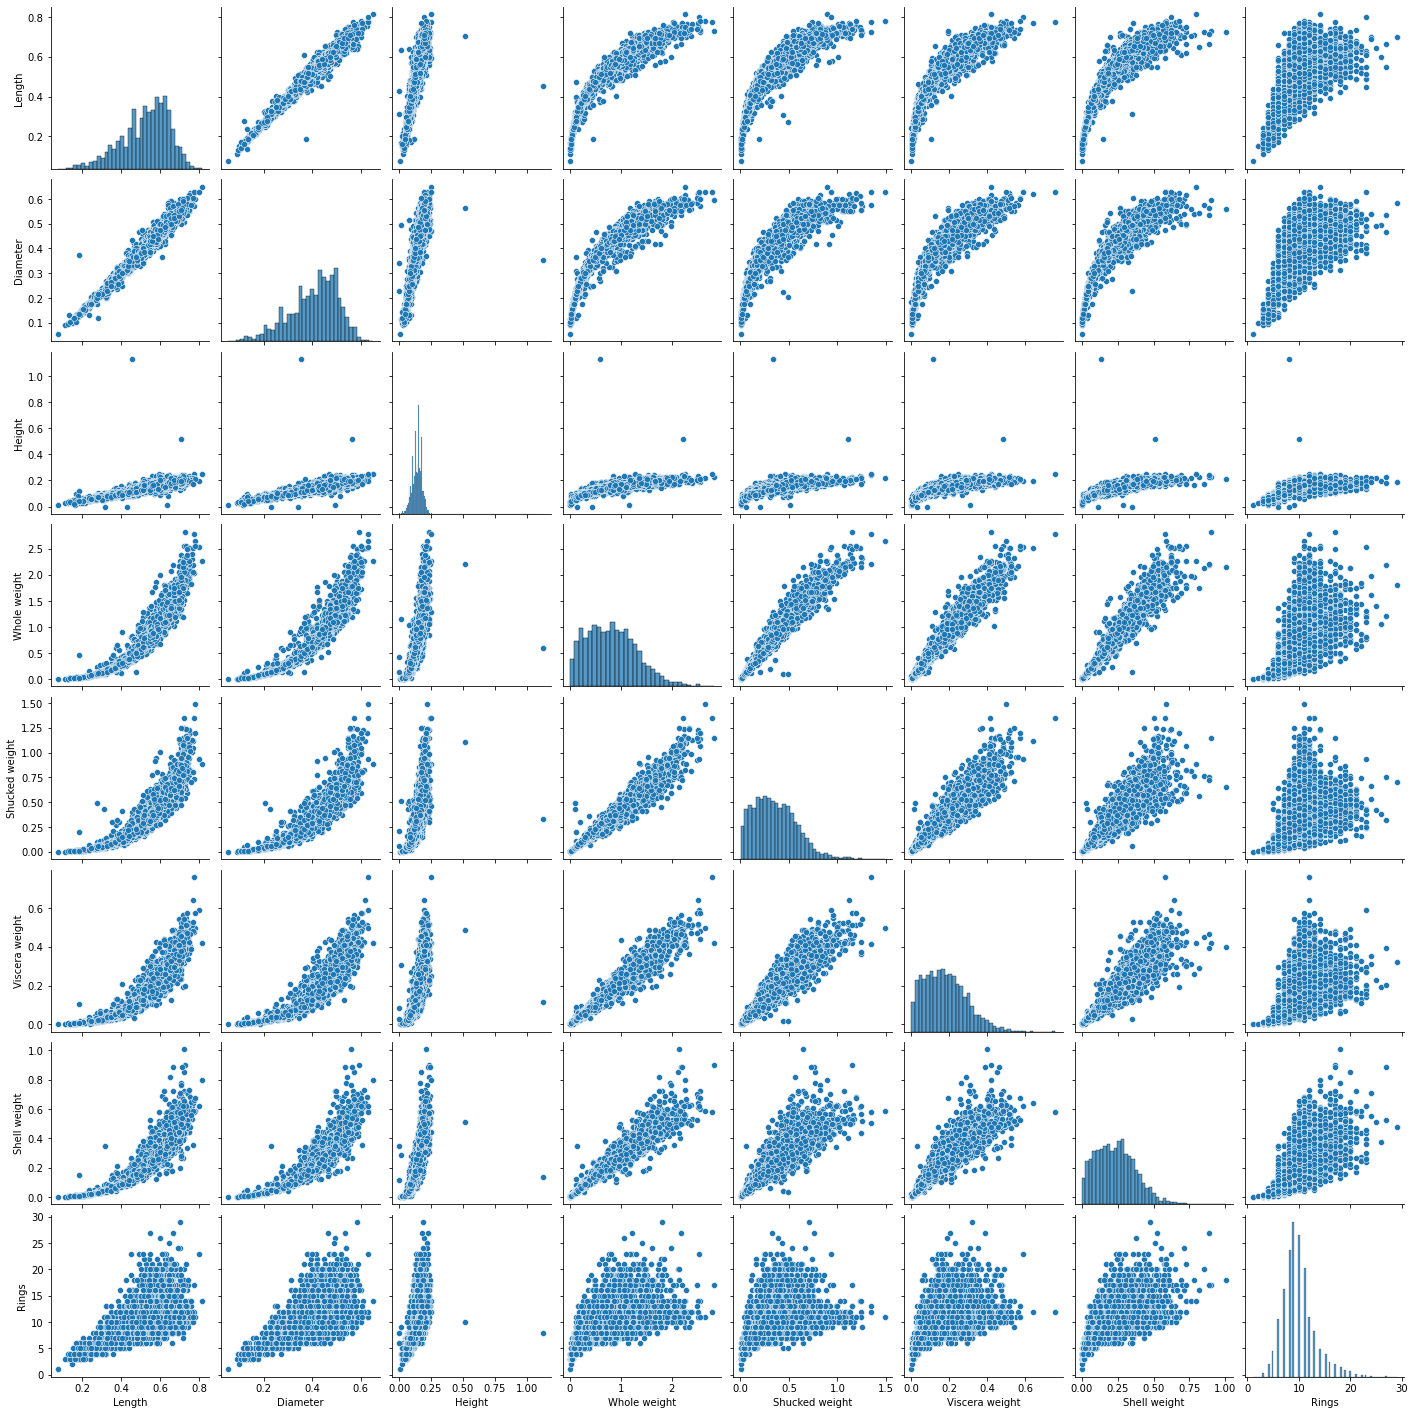

In [13]:
sns.pairplot(Abalone_data)


In [14]:
# Here in the above pairplot length is linearly correlated with diameter while, non-linear relation with height, whole weight, shucked weight, viscera weight and shell weight

In [15]:
# Let's check the correlation between the numerical values.
Abalone_data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

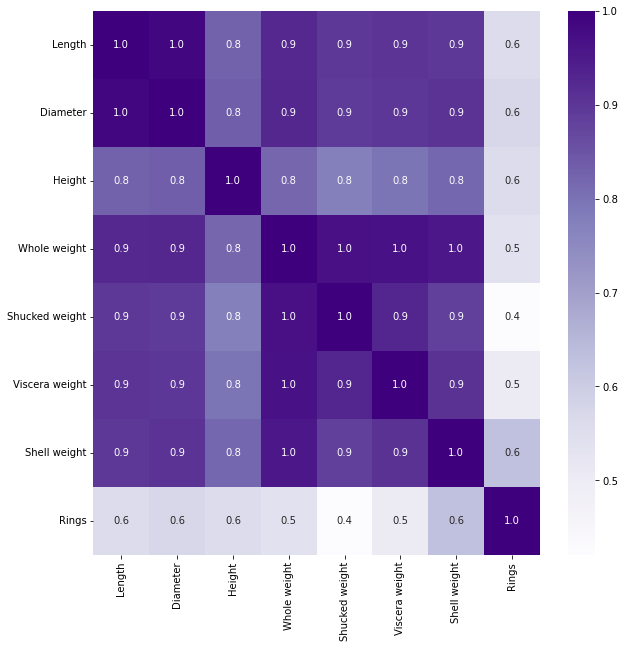

In [16]:
# Let's visualize the above columns in a graphical way for better understanding using heatmap
# We will visualize the above description with the help of heatmap.

plt.figure(figsize=(10,10))
sns.heatmap(Abalone_data.corr(),annot=True,cmap='Purples',fmt='0.1f',cbar=True)

In [17]:
# Here in the above heatmap, we can see that the most dark squares represents the high +ve correlation
# Simillarly the light color squares shows the least correlation.

In [18]:
# Handling the outliers.
Abalone_data = pd.get_dummies(Abalone_data)
dummy_data = Abalone_data.copy()

<AxesSubplot:>

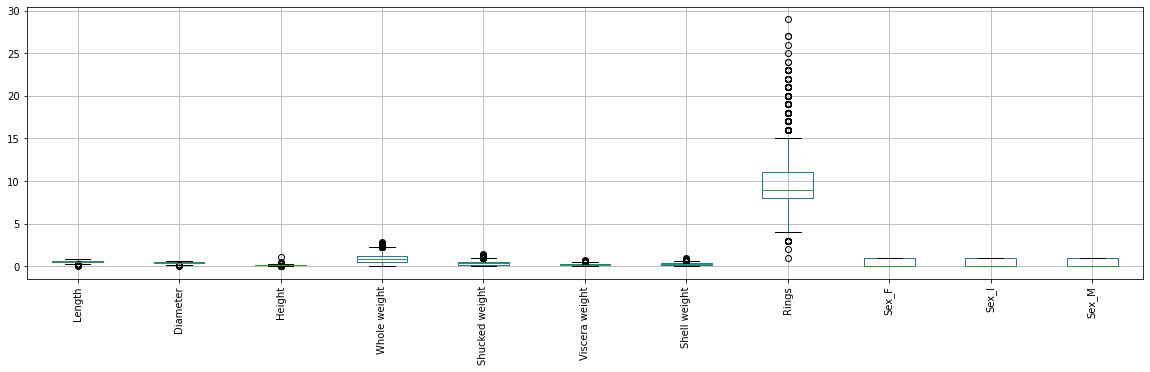

In [19]:
Abalone_data.boxplot( rot = 90, figsize=(20,5))

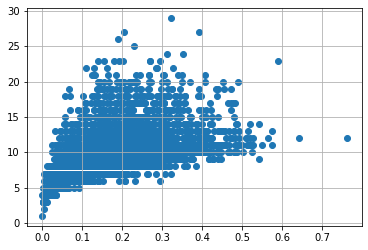

In [20]:
var = 'Viscera weight'
plt.scatter(x = Abalone_data[var], y = Abalone_data['Rings'])
plt.grid(True)

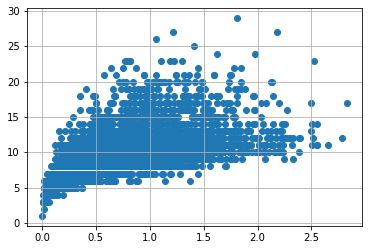

In [21]:
plt.scatter(x = Abalone_data['Whole weight'], y = Abalone_data['Rings'])
plt.grid(True)

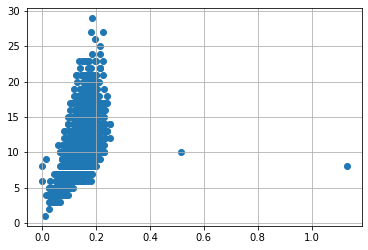

In [22]:
plt.scatter(x = Abalone_data['Height'], y = Abalone_data['Rings'])
plt.grid(True)

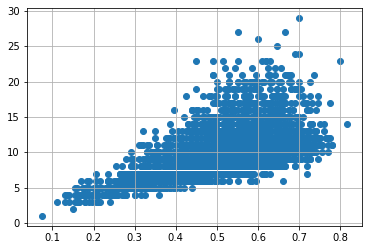

In [23]:
plt.scatter(x = Abalone_data['Length'], y = Abalone_data['Rings'])
plt.grid(True)

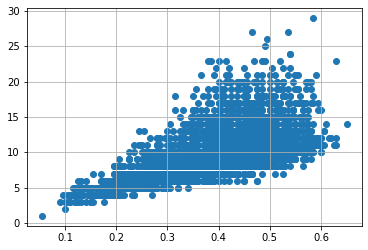

In [24]:
plt.scatter(x = Abalone_data['Diameter'], y = Abalone_data['Rings'])
plt.grid(True)

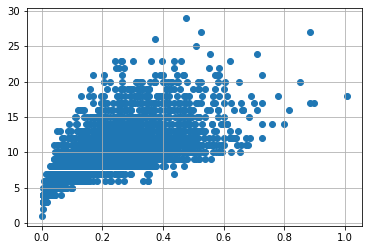

In [25]:
plt.scatter(x = Abalone_data['Shell weight'], y = Abalone_data['Rings'])
plt.grid(True)

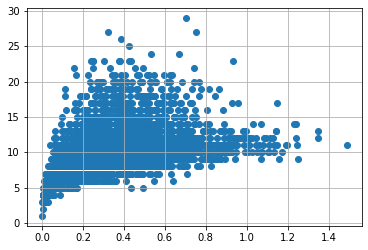

In [26]:
plt.scatter(x = Abalone_data['Shucked weight'], y = Abalone_data['Rings'])
plt.grid(True)

In [27]:
# Here in the above graphs we can notice some points are far from the whole data points.
# They are may be outliers or may not be.we will handle these outliers with zscore after spliting the data into train & test 


# Let's split the whole data into train and test.
x=Abalone_data.drop('Rings', axis=1)
y=Abalone_data['Rings']

In [28]:
x

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [29]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [30]:
from scipy.stats import zscore
z=np.abs(zscore(x))
threshold=3
np.where(z>3)

(array([  81,  129,  163,  164,  165,  165,  165,  166,  168,  170,  236,
         236,  236,  237,  237,  238,  238,  239,  277,  334,  358,  358,
         526,  526,  694,  696,  696,  719,  719,  720,  720,  891,  891,
         891, 1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206,
        1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418,
        1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756,
        1757, 1759, 1761, 1762, 1762, 1762, 1763, 1763, 1763, 1821, 1982,
        1986, 1987, 1987, 2051, 2090, 2108, 2114, 2114, 2157, 2161, 2208,
        2274, 2334, 2334, 2368, 2381, 2544, 2623, 2624, 2624, 2624, 2625,
        2709, 2710, 2710, 2810, 2810, 2811, 2811, 2811, 2862, 2863, 2863,
        2863, 3007, 3008, 3148, 3149, 3151, 3188, 3427, 3427, 3427, 3599,
        3599, 3628, 3713, 3715, 3715, 3715, 3715, 3800, 3837, 3899, 3899,
        3902, 3961, 3962, 3996, 4145, 4148], dtype=int64),
 array([6, 6, 6, 6, 3, 4, 6, 6, 6, 5, 0, 1, 2, 0, 1, 

In [31]:
Aba_df=x[(z<3).all(axis=1)]
Aba_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [32]:
# Checking skewness
x.skew().sort_values(ascending=False)

Height            3.128817
Sex_F             0.807302
Sex_I             0.765708
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Sex_M             0.557390
Whole weight      0.530959
Diameter         -0.609198
Length           -0.639873
dtype: float64

In [33]:
# Here after checking the skewness we can see that height column has highest skewness and length has minimun skewness.
# Here we will handle the skewness using power transformation. 

from sklearn.preprocessing import power_transform

In [34]:
Abalone_x=power_transform(x)

In [35]:
Abalone_x

array([[-0.68550213, -0.54986033, -1.12451192, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [-1.39634403, -1.38733299, -1.26439579, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [-0.07077438,  0.00853714, -0.06482301, ...,  1.48184628,
        -0.68801788, -0.75948762],
       ...,
       [ 0.59336612,  0.64519089,  1.56508168, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.85337516,  0.76992788,  0.30708344, ...,  1.48184628,
        -0.68801788, -0.75948762],
       [ 1.83447784,  1.72628889,  1.34794324, ..., -0.67483383,
        -0.68801788,  1.31667716]])

In [36]:
pd.DataFrame(Abalone_x,columns=x.columns).skew().sort_values(ascending=False)

Sex_F             0.807302
Sex_I             0.765708
Sex_M             0.557390
Viscera weight    0.039780
Shucked weight    0.027351
Shell weight      0.023390
Whole weight     -0.003980
Diameter         -0.065977
Length           -0.066669
Height           -0.115483
dtype: float64

In [37]:
# Modeling the data.
# Random Forest Regressor

max_accuracy=0
max_RS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=i)
    rf= RandomForestClassifier()
    rf.fit(x_train,y_train)
    x_test_pred=rf.predict(x_test)
    accu=accuracy_score(y_test, x_test_pred)
    print('Accuracy is:',accu, 'random_state', i)
    
    if accu>max_accuracy:
        max_accuracy=accu
        maxRS=i
        print('maximum_accuracy',max_accuracy,'maximum_random_state',i)

Accuracy is: 0.24960127591706538 random_state 1
maximum_accuracy 0.24960127591706538 maximum_random_state 1
Accuracy is: 0.24481658692185007 random_state 2
Accuracy is: 0.2511961722488038 random_state 3
maximum_accuracy 0.2511961722488038 maximum_random_state 3
Accuracy is: 0.2511961722488038 random_state 4
Accuracy is: 0.2535885167464115 random_state 5
maximum_accuracy 0.2535885167464115 maximum_random_state 5
Accuracy is: 0.23205741626794257 random_state 6
Accuracy is: 0.24003189792663476 random_state 7
Accuracy is: 0.24401913875598086 random_state 8
Accuracy is: 0.23046251993620415 random_state 9
Accuracy is: 0.23444976076555024 random_state 10
Accuracy is: 0.23763955342902712 random_state 11
Accuracy is: 0.2535885167464115 random_state 12
Accuracy is: 0.22966507177033493 random_state 13
Accuracy is: 0.22089314194577353 random_state 14
Accuracy is: 0.2567783094098884 random_state 15
maximum_accuracy 0.2567783094098884 maximum_random_state 15
Accuracy is: 0.24162679425837322 random_s

In [38]:
print('The Best Accuracy Score is:',max_accuracy,'on random_state',maxRS)

The Best Accuracy Score is: 0.27910685805422647 on random_state 82


In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [40]:
print(classification_report(y_test,x_test_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.58      0.39      0.47        18
           5       0.33      0.37      0.35        38
           6       0.28      0.23      0.25        79
           7       0.26      0.30      0.27       108
           8       0.28      0.35      0.31       156
           9       0.26      0.33      0.29       208
          10       0.25      0.36      0.29       186
          11       0.22      0.19      0.21       156
          12       0.13      0.07      0.09        88
          13       0.15      0.10      0.12        61
          14       0.21      0.06      0.10        49
          15       0.25      0.10      0.15        29
          16       0.18      0.13      0.15        15
          17       0.17      0.05      0.07        21
          18       0.00      0.00      0.00        11
          19       0.00      0.00      0.00         9
          20       0.00    

In [41]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt=dt.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_dt)*100)
print(classification_report(y_test,pred_dt))

Accuracy: 18.660287081339714
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.23      0.17      0.19        18
           5       0.24      0.18      0.21        38
           6       0.24      0.22      0.23        79
           7       0.21      0.26      0.23       108
           8       0.26      0.30      0.28       156
           9       0.23      0.21      0.22       208
          10       0.22      0.28      0.25       186
          11       0.14      0.12      0.13       156
          12       0.09      0.08      0.09        88
          13       0.09      0.10      0.09        61
          14       0.08      0.06      0.07        49
          15       0.04      0.03      0.04        29
          16       0.00      0.00      0.00        15
          17       0.15      0.10      0.12        21
          18       0.00      0.00      0.00        11
          19       0.00      0.00      0.00         

In [42]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_lr)*100)
print(classification_report(y_test,pred_dt))

Accuracy: 24.880382775119617
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.23      0.17      0.19        18
           5       0.24      0.18      0.21        38
           6       0.24      0.22      0.23        79
           7       0.21      0.26      0.23       108
           8       0.26      0.30      0.28       156
           9       0.23      0.21      0.22       208
          10       0.22      0.28      0.25       186
          11       0.14      0.12      0.13       156
          12       0.09      0.08      0.09        88
          13       0.09      0.10      0.09        61
          14       0.08      0.06      0.07        49
          15       0.04      0.03      0.04        29
          16       0.00      0.00      0.00        15
          17       0.15      0.10      0.12        21
          18       0.00      0.00      0.00        11
          19       0.00      0.00      0.00         

In [43]:
# Support Vector Classifier 
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,pred_svc)*100)
print(classification_report(y_test,pred_svc))

Accuracy: 26.71451355661882
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        18
           5       0.29      0.16      0.20        38
           6       0.37      0.34      0.36        79
           7       0.38      0.38      0.38       108
           8       0.39      0.37      0.38       156
           9       0.21      0.52      0.30       208
          10       0.24      0.32      0.27       186
          11       0.27      0.22      0.24       156
          12       0.00      0.00      0.00        88
          13       0.00      0.00      0.00        61
          14       0.00      0.00      0.00        49
          15       0.00      0.00      0.00        29
          16       0.00      0.00      0.00        15
          17       0.00      0.00      0.00        21
          18       0.00      0.00      0.00        11
          19       0.00      0.00      0.00         9

In [44]:
# Let's chech the cross validation score.
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(rf,x,y,cv=13)
print('Cross_validation_score for RandomForest is:',cvs.mean())


Cross_validation_score for RandomForest is: 0.24446493503787287


In [45]:
cvs

array([0.20496894, 0.16149068, 0.27018634, 0.21118012, 0.29906542,
       0.26791277, 0.20560748, 0.26168224, 0.27102804, 0.24922118,
       0.23364486, 0.25545171, 0.28660436])

In [47]:
# Here Random forest is performing good as compared to others.
RandomForestClassifier()

RandomForestClassifier()

In [49]:
from sklearn.model_selection import GridSearchCV
parameters= {'max_features':['auto','sqrt','log2'],
        'max_depth':[2,3,4,5,6],
        'criterion':['gini','entropy']}

In [50]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto'}

In [51]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [52]:
GCV.best_estimator_

RandomForestClassifier(max_depth=3)

In [53]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.25996810207336524

In [ ]:
# The final accuracy is almost approx.26%.

In [55]:
import joblib
joblib.dump(GCV.best_estimator_,"Abalone_Age.pkl")

['Abalone_Age.pkl']